# Introduction

## Objective

The objective of this experiment is to evaluate and compare the performance of machine learning models in reverse engineering a mathematical algorithm for insurance rating. Specifically, we aim to determine the minimum number of samples required to achieve acceptable performance metrics for the models. These metrics include the coefficient of determination (R²), mean squared error (MSE), and mean absolute error (MAE).
## Methodology

The experiment involves the following steps:

1. **Data Loading**: Load the datasets containing the performance results of various machine learning models trained on different sample sizes.
2. **Threshold Definition**: Define the thresholds for the performance metrics based on academic literature:
    - R² > 0.8: This threshold is often considered sufficient for most applications, indicating that the model explains more than 80% of the variance in the data (Draper & Smith, 1998; Cohen, 1988).
    - MSE < 10% of the variance of the target variable: This threshold ensures that the mean squared error is significantly lower than the variance of the target variable, indicating good model performance (Bishop, 2006).
    - MAE < 10% of the mean of the target variable: This threshold ensures that the mean absolute error is low relative to the scale of the data, indicating accurate predictions (Hastie, Tibshirani, & Friedman, 2009).
3. **Model Fitting**: Fit a logarithmic function to the performance metrics (R², MSE, and MAE) as a function of the sample size for both datasets. This will allow us to predict the performance of models at different sample sizes.
4. **Sample Size Prediction**: Using the fitted models, predict the minimum number of samples required to meet the defined thresholds for each metric.
5. **Comparison and Visualization**: Plot the performance metrics against the sample sizes for both datasets. Use different colors to distinguish between the datasets and add threshold lines to indicate the acceptable performance levels.

## Expected Outcomes

By the end of this experiment, we expect to:

1. Identify the minimum number of samples required for the machine learning models to achieve acceptable performance metrics for each dataset.
2. Compare the performance of models from the two datasets and determine which dataset allows for more efficient training in terms of sample size.
3. Provide visual insights into how the performance metrics evolve with increasing sample sizes for both datasets.

This analysis will help in understanding the sample size requirements for effectively reverse engineering mathematical algorithms using machine learning models. It will also offer a comparative evaluation of different datasets in terms of their suitability for training robust predictive models.

## References

- Draper, N. R., & Smith, H. (1998). Applied Regression Analysis. Technometrics, 40(3), 297-298.
- Cohen, J. (1988). Statistical Power Analysis for the Behavioral Sciences.
- Bishop, C. M. (2006). Pattern Recognition and Machine Learning. Springer.
- Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning. Springer Series in Statistics.
- Gramegna, A., & Giudici, P. (2021). Shap and lime: an evaluation of discriminative power in credit risk, Frontiers in Artificial Intelligence, 4, 1–6.
- Guidotti, R., Monreale, A., Ruggieri, S., Turini, F., Giannotti, F., & Pedreschi, D. (2018). A survey of methods for explaining black box models, ACM Computing Surveys, 51(5), 1–42.
- National Association of Insurance Commissioners. (2019). Regulatory Review of Predictive Models.

---

This introduction sets the stage for the detailed analysis and visualization that will follow in the notebook.


# Experiment Implementation

## Define samples sizes

In [3]:
from au_rating_engine import generate_au_rating_data
au_sample_data = generate_au_rating_data(100)
au_sample_data.to_csv('data.csv', index=False)

Processing rows: 100%|██████████| 100/100 [00:00<00:00, 1467.43it/s]


In [1]:
from analyzer import analyze_model_performances, pycaret_executor
from au_rating_engine import generate_au_rating_data
from analysis_diagram import plot_model_performance

sample_sizes = [100,1000,5000,10000]

Processing rows: 100%|██████████| 100/100 [00:00<00:00, 1901.25it/s]


Processing: Sample Size = 100, Session ID = 4139


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,228.9647,97673.6447,293.2271,0.3718,0.2855,0.2530,0.0110
knn,K Neighbors Regressor,255.4225,114543.9750,317.6642,0.2117,0.3053,0.2711,0.0180
ridge,Ridge Regression,287.0673,144245.1257,361.7358,0.0448,0.3544,0.3253,0.0120
par,Passive Aggressive Regressor,322.9134,179552.2884,403.1384,-0.1748,0.3946,0.3674,0.0120
et,Extra Trees Regressor,320.5681,180302.5289,404.6870,-0.1885,0.3939,0.3618,0.0220
xgboost,Extreme Gradient Boosting,326.1596,185394.0000,408.4042,-0.1892,0.3991,0.3692,0.0170
lightgbm,Light Gradient Boosting Machine,313.1426,177804.3410,401.7766,-0.1905,0.3850,0.3451,0.0480
br,Bayesian Ridge,326.6087,183073.2303,407.7093,-0.1956,0.3997,0.3740,0.0110
omp,Orthogonal Matching Pursuit,326.6087,183073.2303,407.7093,-0.1956,0.3997,0.3740,0.0120
llar,Lasso Least Angle Regression,326.6087,183073.2303,407.7093,-0.1956,0.3997,0.3740,0.0110


Processing rows: 100%|██████████| 1000/1000 [00:00<00:00, 1882.40it/s]


Processing: Sample Size = 1000, Session ID = 9289


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,198.4055,67637.4879,259.1615,0.5202,0.2419,0.2032,0.0120
en,Elastic Net,210.8689,71952.9482,267.0783,0.4945,0.2595,0.2284,0.0130
ridge,Ridge Regression,267.0718,111923.7453,333.4605,0.2111,0.3279,0.2955,0.0160
br,Bayesian Ridge,268.9449,113431.5349,335.6918,0.2005,0.3301,0.2978,0.0120
lr,Linear Regression,270.0086,114328.4627,337.0265,0.1941,0.3314,0.2990,0.0130
lasso,Lasso Regression,284.9217,126578.1071,354.6997,0.1072,0.3489,0.3165,0.0120
llar,Lasso Least Angle Regression,285.1444,126766.5064,354.9646,0.1059,0.3492,0.3167,0.0120
lightgbm,Light Gradient Boosting Machine,295.6574,135613.5706,367.3091,0.0430,0.3610,0.3278,0.3680
et,Extra Trees Regressor,298.3908,138269.9269,370.7602,0.0254,0.3629,0.3296,0.0430
par,Passive Aggressive Regressor,298.8802,138562.3561,371.3050,0.0217,0.3653,0.3325,0.0120


Processing rows: 100%|██████████| 5000/5000 [00:02<00:00, 2049.52it/s]


Processing: Sample Size = 5000, Session ID = 3412


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,164.3116,48386.0207,219.4892,0.6297,0.2052,0.1693,0.0170
xgboost,Extreme Gradient Boosting,166.6275,49233.6766,221.3862,0.6236,0.2070,0.1727,0.0340
en,Elastic Net,181.9109,54408.7024,232.9566,0.5832,0.2285,0.1987,0.0160
br,Bayesian Ridge,189.8185,59209.1144,243.1123,0.5458,0.2386,0.2075,0.0180
ridge,Ridge Regression,189.9241,59270.6911,243.2388,0.5453,0.2387,0.2076,0.0150
lr,Linear Regression,189.9936,59311.3438,243.3141,0.5451,0.2389,0.2077,0.0160
lar,Least Angle Regression,190.0664,59350.3534,243.4013,0.5447,0.2389,0.2078,0.0160
lasso,Lasso Regression,201.0460,65918.5288,256.5210,0.4943,0.2531,0.2209,0.0170
llar,Lasso Least Angle Regression,201.1334,65972.3910,256.6252,0.4939,0.2532,0.2210,0.0170
lightgbm,Light Gradient Boosting Machine,194.8403,66057.7736,256.6473,0.4937,0.2422,0.2043,0.4650


Processing rows: 100%|██████████| 10000/10000 [00:04<00:00, 2028.13it/s]


Processing: Sample Size = 10000, Session ID = 5973


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,83.1296,16228.4631,127.1452,0.8815,0.1173,0.0840,0.0400
lightgbm,Light Gradient Boosting Machine,119.4775,29776.6326,172.3414,0.7831,0.1547,0.1209,0.5020
et,Extra Trees Regressor,139.8147,40114.6863,199.8830,0.7082,0.1815,0.1437,0.2860
lar,Least Angle Regression,151.4375,40651.4216,201.3703,0.7039,0.1886,0.1606,0.0250
br,Bayesian Ridge,151.4285,40647.1525,201.3598,0.7039,0.1886,0.1606,0.0250
ridge,Ridge Regression,151.4340,40649.7715,201.3663,0.7039,0.1886,0.1606,0.0210
lr,Linear Regression,151.7164,40776.9921,201.6918,0.7030,0.1891,0.1610,0.0270
knn,K Neighbors Regressor,152.4489,42379.8285,205.7336,0.6908,0.1895,0.1555,0.0240
lasso,Lasso Regression,159.2962,44512.1741,210.7183,0.6758,0.1990,0.1700,0.0230
llar,Lasso Least Angle Regression,159.3528,44540.7115,210.7860,0.6756,0.1991,0.1701,0.0250


Minimum sample size for R2 threshold: 10000
Minimum sample size for MSE threshold: 100
Minimum sample size for MAE threshold: 100
Overall minimum sample size needed: 10000


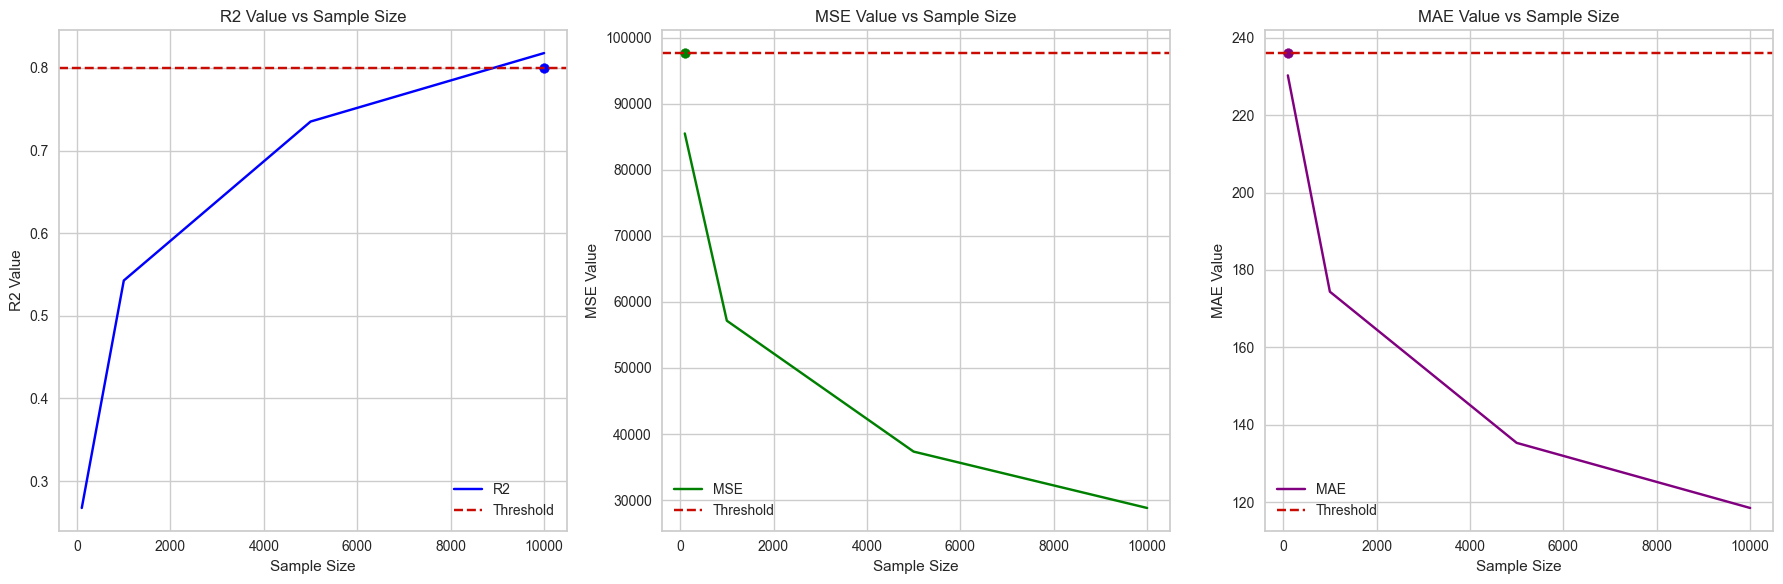

In [2]:
import pandas as pd
experiment_type = 'experiment'

result_file = experiment_type + '.csv'

model_results = []

# Iterate on all the sample sizes
for i, size in enumerate(sample_sizes):
    # Generate sample data for the specific size
    au_sample_data = generate_au_rating_data(size)
    best_model  = analyze_model_performances(sample_data=au_sample_data, target_column='Liability Premium', output_file=result_file)       
    
    model_results.append({       
        'Sample Size': size,
        'Best Model': best_model
    })
plot_model_performance(result_file, sample_sizes=sample_sizes,output_plots_prefix=experiment_type)
models_result_df = pd.DataFrame(model_results)

Processing rows: 100%|██████████| 7000/7000 [00:03<00:00, 2029.22it/s]


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,110.2411,24620.2186,156.6622,0.8256,0.1447,0.1137,0.0360
lightgbm,Light Gradient Boosting Machine,148.5955,44128.7679,209.2046,0.6898,0.1883,0.1514,0.4720
knn,K Neighbors Regressor,161.4749,48075.0117,218.7917,0.6604,0.2014,0.1651,0.0230
et,Extra Trees Regressor,167.1402,51385.9596,226.0819,0.6377,0.2095,0.1746,0.2080
br,Bayesian Ridge,175.2840,53489.7240,230.6512,0.6228,0.2184,0.1873,0.0210
ridge,Ridge Regression,175.3526,53527.8609,230.7335,0.6225,0.2185,0.1874,0.0230
lar,Least Angle Regression,175.4126,53561.2441,230.8054,0.6223,0.2186,0.1875,0.0230
lr,Linear Regression,175.9375,53883.0869,231.4921,0.6200,0.2194,0.1881,0.0210
en,Elastic Net,178.5474,54874.6965,233.6497,0.6131,0.2230,0.1924,0.0190
lasso,Lasso Regression,184.3288,58599.9803,241.4313,0.5867,0.2302,0.1981,0.0200


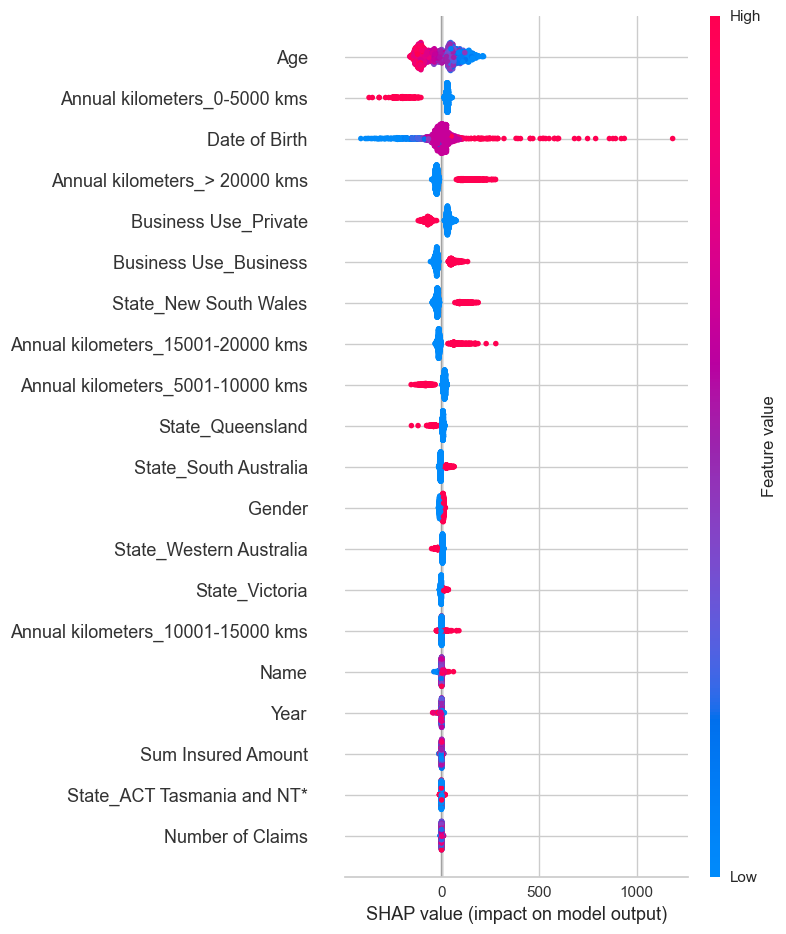

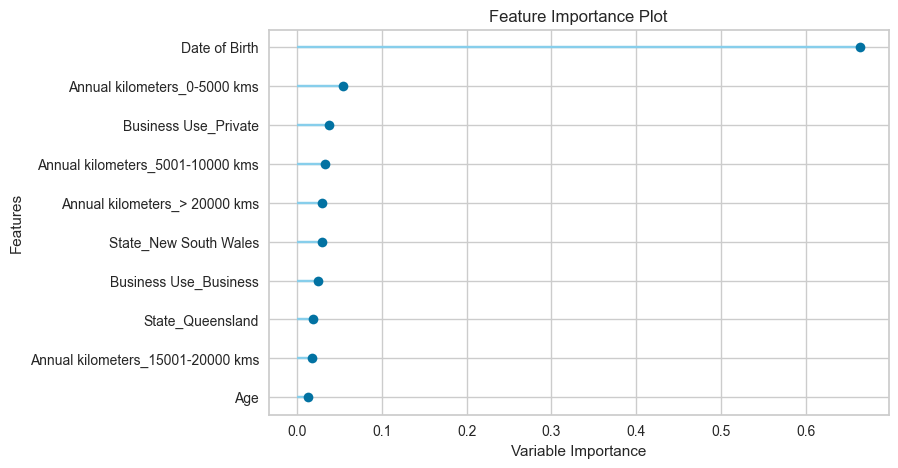

TypeError: plot_model() got an unexpected keyword argument 'feature'

In [12]:
from analysis_diagram import interpret_xgboost_model
from pycaret.regression import setup, compare_models, plot_model, interpret_model
# Final Test
au_sample_data = generate_au_rating_data(7000)

#best_model = pycaret_executor(au_sample_data, 'Liability Premium')
exp = setup(
        data=au_sample_data,
        target='Liability Premium',
        session_id='123',
        train_size=0.8,
        normalize=True,
        verbose=False
)
best_model = compare_models()

# SHAP Summary Plot
interpret_model(best_model, plot='summary')
    
# SHAP Dependence Plot
interpret_model(best_model, plot='dependence', feature='feature_name')
    
 # SHAP Force Plot for a single observation (index 1 in this case)
interpret_model(best_model, plot='reason', observation=1)
    
# SHAP Decision Plot
interpret_model(best_model, plot='reason', observation=[0, 1, 2, 3, 4])  # Use multiple indices for a decision plot
    
# SHAP Heatmap
interpret_model(best_model, plot='correlation')
    
# SHAP Waterfall Plot for a single observation (index 1 in this case)
interpret_model(best_model, plot='reason', observation=1)
    


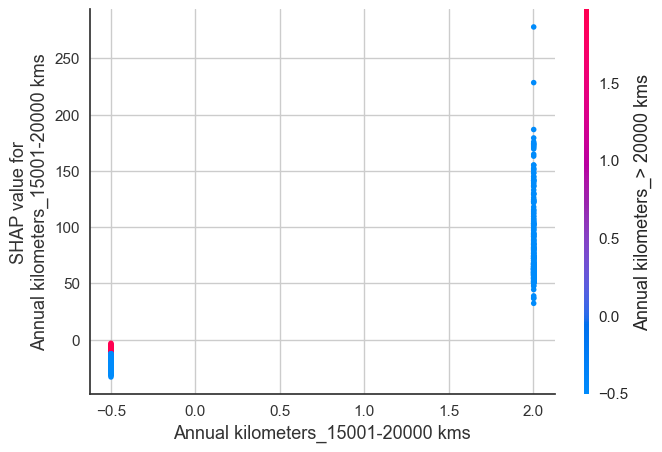

In [17]:
 # SHAP Force Plot for a single observation (index 1 in this case)
interpret_model(best_model, plot='reason', observation=1)
    
# SHAP Decision Plot
interpret_model(best_model, plot='reason', observation=[0, 1, 2, 3, 4])  # Use multiple indices for a decision plot
    
# SHAP Heatmap
interpret_model(best_model, plot='correlation')
    
# SHAP Waterfall Plot for a single observation (index 1 in this case)
interpret_model(best_model, plot='reason', observation=122)
    

    

In [ ]:
from pycaret.regression import tune_model

# Tune the model
tuned_model = tune_model(best_model)
print("Model tuned.")

In [ ]:
from pycaret.regression import ensemble_model

# Ensemble the model
ensembled_model = ensemble_model(tuned_model)

In [ ]:
from pycaret.regression import finalize_model

# Finalize the model
final_model = finalize_model(ensembled_model)

In [ ]:
from pycaret.regression import save_model

save_model(final_model, experiment_type+'_pycaret_model')

In [ ]:
from pycaret.regression import load_model, predict_model

loaded_model = load_model(experiment_type+'_pycaret_model')
final_test_au_samples = generate_au_rating_data(50000)

predictions = predict_model(loaded_model, final_test_au_samples)
